<h1>What's Federated Learning</h1>
The concept of federated learning is proposed by Google AI on 2016, Their main idea is
to build machine learning models based on data sets that are distributed across multiple devices
while preventing data leakage and sharing data between any two couple of devices. Recent improvements have been focusing on overcoming the statistical challenges, (such as non iid-data and the amount of data hold by each client) and also in improving security in federated learning.
Federated Learning (FL), is highly adapted to the healthcare domain, it's simply used to make a set of hospitals to collaboratively train a joint model, which will be used by all the hospitals after that.
<img src="Images/FL_gen.png"  style="width:600px ;height:600px"> 

<h1>What's Differential Privacy</h1>
Differential Privacy was early introduced by Dwork et al,  The methods of differential privacy, k-anonymity, and
diversification  involve in adding noise to the data, or using generalization methods to obscure
certain sensitive attributes until the third party cannot distinguish the individual, thereby making
the data impossible to be restore to protect user privacy. However, the root of these methods still
require that the data are transmitted elsewhere and these work usually involve a trade-off between
accuracy and privacy. In, most of recents reseach has introduced a differential privacy approach to federated
learning in order to add protection to client-side data by hiding client’s contributions during
training, using differents approaches.
<img src="Images/GDP.png"  style="width:400px ;height:200px"> <img src="Images/LDP.png"  style="width:400px ;height:200px">
 

<h1>Privacy Enhancing Technologies (PETs)</h1>
Privacy-enhancing technologies or PET are designed to prevent data leaks while balancing privacy with usability. Some PETs even prevent bad actors from identifying to whom the collected data belongs - if a leak were to occur, the data would be virtually useless to cybercriminals, and they are mainly digital solutions (Softwares).
There are many different types of PETs, each designed to solve a specific business problem. While some are better at aggregated analytics, others are more suited for precise results. Likewise, some may be ideal for deriving insights from sensitive data, while others are best for data exploration.
we will mention  the following frameworks:
<ul>
    <li>  <a href="https://flower.dev">Flower</a> </li>
    <li>  <a href="https://github.com/OpenMined/PySyft">Pysyft</a> </li>
    <li>  <a href="https://opacus.ai/">Opacus</a></li>
</ul>

<h1> MEDfl</h1>
MEDfl is a new python package, which is a hybridization of Flower and Opacus, while getting inspired by the Pysyft framework, the main strengths of MEDfl is that  both users and developpers will  benifit from  all features of the three listed frameworks.
<h2>A small real world scenario</h2>
<b>Martin</b> is an AI researcher, his main interest is  the applications of AI into the healthcare domain.
Recently, he has obtained a call from a prestigious institute, in order to make a study about the realisation of a new project. The project's goal is  designing and developping a federated learning system between a set of hospitals, and that by training and using a deep learning model with preserving the privacy of all patient records.

When Martin finished the first analysis of the project statement, he realized that the project involve the use of Federated Learning, Differential Privacy within a good storage monitoring system.

Fortunately, Martin knows MEDfl, and he is pretty sure that it's designed for such tasks, and it will be do the desired work.
Medfl with his two main sub-packages,<b>NetManager</b> , <b>Federated</b>, let us designing FL expirements and simulating real world scenarios, and that by using differents options to make  differents FL architectures (or setups) as well as using differents FL pipelines.



<h1> MEDfl</h1>
MEDfl is a new python package, which is a hybridization of Flower and Opacus, while getting inspired by the Pysyft framework, the main strengths of MEDfl is that  both users and developpers will  benifit from  all features of the three listed frameworks.
<h2>A small real world scenario</h2>
<b>Martin</b> is an AI researcher, his main interest is  the applications of AI into the healthcare domain.
Recently, he has recieved a call from a prestigious institute, in order to make a study about the realisation of a new project. The project's goal is  designing and developping a federated learning system between a set of hospitals, and that by training and using a deep learning model with preserving the privacy of all patient records.

When Martin finished the first analysis of the project statement, he realized that the project involve the use of Federated Learning, Differential Privacy within a good storage monitoring system.

Fortunately, Martin knows MEDfl, and he is pretty sure that it's designed for such tasks, and it will be do the desired work.
Medfl with his two main sub-packages,<b>NetManager</b> , <b>Federated</b>, let us designing FL expirements and simulating real world scenarios, and that by using differents options to make  differents FL architectures (or setups) as well as using differents FL pipelines.



<h1>NetManager Sub-Package</h1>
In order ot start simulating, hospitals architectures, their datasets, and theirs interactions. Martin should  familiarize with The NetManager Sub-Package, because, it provides the mechanizmes to :
  <ul>
    <li> Choose the dataset format used by all hospitals, as we are working in a <b>Horizontal Federated Learning HFL</b> settings.  </li>
    <li> Create virtual hospitals in a two way :</li>
    <h5>Automatically : </h5> 
      This method used when Martin doesn't have an idea about hospitals name, their datasets. so, the creation will based on some  variables on the datasets, in our Proof-Of-Concept with the eICU dataset, there are two variables that can be used, "site_hosiptal, and "site_region".  <br> Note that, hospitals can participate for <b>training</b> or for <b>testing</b> only. (this may be changed to support both modes) . <br> the set of hospitals or (Nodes) perform a network, and on MEDfl terminology, a network and its additional informations, refered as a <b>FLsetup (Federated Learning Setup)</b> <br>After the creation of an <b>FLsetup</b> it will be stored on the DB, by a unique ID, a name, a description, and a creation date.
  <h5>Manually :</h5>
      Martin can also create a FLsetup manually, create a network, and add each node separately, then uploade a dataset on each node.
    
  </ul>  
In the following section we will tranlsate all this paragraph to code, and show how powerful and easy to use <b>MEDfl</b> is !
    

<h3> 1) Create a FLsetup Automatically</h3>
To create a FLsetup (network, training nodes and test nodes) manually, with MEDfl, we should follow the following steps: <ul>
    <li>Create a network </li>
    <li>Create the FLsetup object, to make things more organized, and facilitate the storage process</li>
    <li>Create the master dataset table, that contains the dataset that be used to create all the nodes (hospitals).</li>
    <li>Select a column from the dataset, then create training and testing nodes using its modalities (unique values)</li>  
 
</ul>   
 

In [57]:
import sys
sys.path.append('..')

import os
os.environ['PYTHONPATH'] = '..'

In [58]:
!python ../scripts/create_db.py


In [59]:
from Medfl.LearningManager.utils import *
empty_db()

<h4>Network Creation</h4>
The creation of a network in MEDfl, like any object creation in Python, is simply done by calling the Network Class, and create a network object by passing the name of the network. below you find the illustration of the network class, its attributes and functions.
(add class diagram)

In [60]:
from Medfl.NetManager.network import Network
network_obj = Network(name="Auto_network")

print(network_obj.name)


Auto_network


<h4> Master Dataset Table Creation</h4>
To create a the master dataset table, we have to provide a <b>CSV File</b>, that contain the dataset, 
then the "create_master_dataset" function from the Network class, will create a table on the MySQL DB. 
and from this table, we will generate our train/test nodes and datasets. <br>
<b>Note:</b> if the table already exists on the DataBase, the function will retrun an exception message.

In [61]:


network_obj.create_master_dataset()



<h4>FLsetup Creation</h4>
The same for FLsetup, we call the FLsetup Class, to create a FLsetup object by passing the name of the FLsetup, its description, and the network associated ot it. <br>below you find the illustration of the network class, its attributes and functions. (add class diagramm)

In [62]:
from Medfl.NetManager.flsetup import FLsetup
fl_setup = FLsetup(name = "Flsetup1", description = "The first fl setup",network = network_obj)

<h4>Nodes Creation</h4>
The user should create a parameters dictionary that contains  :
<ul> 
    <li>The name of the column that be used to create the nodes, which is the main element in the <b>Automatic Method</b></li> 
    <li> The lists of the train/test nodes</li>
    </ul> 
and parse it to the create_nodes_from_master_dataset function from the FLsetup class.<br>
Node is also an object, and it will be stored on the DataBase.

In [63]:
params_dict = {'column_name' : 'site_region','train_nodes' : ["Midwest","South"] , 'test_nodes' : ['West','Northeast'] }

eicu_nodes = fl_setup.create_nodes_from_master_dataset(params_dict = params_dict )

[node.name  for node in eicu_nodes]  

['Midwest', 'South', 'West', 'Northeast']

<h4>Federated DataSet</h4>
the function "create_federated_dataset", will create, train loaders, test loaders from the datasets of the nodes.
in the automatic method, the datasets is created from the master dataset table, the trainloader of each node will contains the records with the same name.<br>
After the creation of the federated dataset, the FLsetup will be stored into the FLsetup table in the DB.


In [64]:
fl_dataset = fl_setup.create_federated_dataset()
len(fl_dataset.testloaders[1])

SELECT * FROM MasterDataset WHERE site_region = 'Midwest'
SELECT * FROM MasterDataset WHERE site_region = 'South'
SELECT * FROM MasterDataset WHERE site_region = 'West'
SELECT * FROM MasterDataset WHERE site_region = 'Northeast'


708

<h3>2) Create a FLsetup Manually</h3>
The manual creation of a FLsetup  with MEDfl, it's a bit different from the the automatic method,but it stays on the same scope, the only difference is here, we should create all the object (FLsetup,network, training nodes and test nodes),
We will start doing the following : <ul>
    <li>Create a network </li>
    <li>Create Master Dataset, Here the master_dataset table will be used to ensure that all nodes hold the same dataset format (horizontal federated learning)</li>
    <li> Create train and test nodes, inside the created network .
    <li> Upload datasets inside each node </li>    
    <li>Create the FLsetup object, to make things more organized, and facilitate the storage process</li>
     
 
</ul>   

<h3>Network Creation</h3>

In [65]:
from Medfl.NetManager.network import Network
network_obj = Network(name="man_network")
network_obj.create_network()

<h3>Nodes creation</h3>
we will create 3 hospitals, two are for training, and the last one is for testing (after the federation, and this by setting the train variable to "1" for the training nodes, and to "0" for the testing Node. <br>
Then we add these nodes to our network.

In [66]:
from Medfl.NetManager.node import Node

hospital_1,hospital_2,hospital_3 = Node(name = "hospital_1", train = 1),Node(name = "hospital_2", train = 1), Node(name = "hospital_3", train = 0) 



<h3>Add this nodes to the network</h3>

In [67]:
network_obj.add_node(hospital_1)
network_obj.add_node(hospital_2)
network_obj.add_node(hospital_3)

<h3>Uploading Datasets into nodes</h3>
To upload a dataset into a node, we have to choose a csv file, then this file will be stored on the DataSet table on the DB.

In [68]:

hospital_1.upload_dataset( dataset_name = "hospital_1_dataset" , path_to_csv='D:\\ESI\\3CS\\PFE\\last_year\\Code\\MEDfl\\notebooks\\eicu_test_1.csv'  )
hospital_2.upload_dataset( dataset_name = "hospital_2_dataset" , path_to_csv='D:\\ESI\\3CS\\PFE\\last_year\\Code\\MEDfl\\notebooks\\eicu_test_2.csv')
hospital_3.upload_dataset( dataset_name = "hospital_3_dataset" , path_to_csv='D:\\ESI\\3CS\\PFE\\last_year\\Code\\MEDfl\\notebooks\\eicu_test_3.csv' )

<h3>Create the FLsetup and Generate the federated dataset</h3>

In [69]:
from Medfl.NetManager.flsetup import FLsetup
fl_setup = FLsetup(name = "Manual_Flsetup", description = "The first manual fl setup",network = network_obj)

In [70]:
fl_dataset = fl_setup.create_federated_dataset()
 

<h1>Federated Sub-Package</h1>
Once Martin Finish his work on the architecture of hospitals, and their datasets, He starts thinking on the theoritical side of federated learning of the project, that includes, the machine learning model and its parameters and hyperparameters, the federated learning server and its parameters (number of rounds, number of clients per rounds, the aggregation algorithms, ...etc). <br>
<b>The Federated module</b>  of <b>MEDfl</b>, which is based on the <a href="https://flower.dev/">Flower</a> framework, is well designed for doing this task, it's mainly follows the flower paradigm, but with many customization, to deal with the SQL database, and to be homogeneous with the <b>NetManager</b>

<h2>How it works ?</h2>
The Federated module, can only be used after the creation of an <b>FLsetup</b>, because the FLsetup will generate a federated dataset, which be used by an <b>FLpipeline</b> object.
<h2> The Code</h2>
Let's create a random FLsetup, then use its object to read one of the created FLsetup from the database.

In [71]:
random_flsetup = FLsetup(name = "Random_FLsetup", description = "A random FLsetup",network = Network("Random_net"))

In [72]:
random_flsetup.list_allsetups()

,FLsetupId,name,description,creation_date,NetId,column_name
0,1,Flsetup1,The first fl setup,2023-11-13 15:20:22,1,site_region
1,2,Manual_Flsetup,The first manual fl setup,2023-11-13 15:20:23,2,None


In [73]:
New_flsetup = random_flsetup.read_setup( FLsetupId = 1) # this is not working with auto_net

In [74]:
New_flsetup.network.name

'Auto_network'

In [75]:
New_flsetup.column_name

'site_region'

<h2>Federated DataSet</h2> 
This object has the role of the connector between the <b>NetManager</b> and the <b>Federated</b> modules.<br>
The FLsetup class's function "create_federated_dataset", will go through all nodes,and generate trainloders & valloaders for the train nodes, and testloaders for the test nodes

In [76]:
#here's the reduduncy of feddatasets
fl_dataset = New_flsetup.create_federated_dataset()

fl_dataset.size

SELECT * FROM MasterDataset WHERE site_region = 'Midwest'
SELECT * FROM MasterDataset WHERE site_region = 'South'
SELECT * FROM MasterDataset WHERE site_region = 'West'
SELECT * FROM MasterDataset WHERE site_region = 'Northeast'


17

<h2>Machine Learning </h2>
As MEDfl is based on flower, it has only 3 models based on torch neural nets  :
<ul>
    <li> Binary Classifier </li>
    <li> Multiclass Classifier</li>
    <li> Linear Regressor</li>
</ul>
the choice of the model and all machine learning parameters (learning rate, eopch size, train epochs), should be declared on a YAML file.

In [77]:
import torch
import torch.nn as nn
import torch.optim as optim

class BinaryClassifier(nn.Module):
  def __init__(self,input_dim,hidden_dim,output_dim):

    super(BinaryClassifier, self).__init__()
    self.fc1 = nn.Linear(input_dim,hidden_dim)
    self.fc2 = nn.Linear(hidden_dim,2*hidden_dim)
    self.fc3 = nn.Linear(2*hidden_dim,output_dim)

  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))#softmax
    return x
binary_classifier= BinaryClassifier(17,6,1)
optimizer,criterion = optim.SGD(binary_classifier.parameters(), lr=0.0001),nn.BCELoss()
binary_classifier

BinaryClassifier(
  (fc1): Linear(in_features=17, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=12, bias=True)
  (fc3): Linear(in_features=12, out_features=1, bias=True)
)

In [78]:
from Medfl.LearningManager.model import Model
global_model = Model(binary_classifier,optimizer,criterion)

<h2>Aggregation Algorithms (Strategy)</h2>
Aggregation algorithms are the mechanizms used by the server to produce a joint unified model, they are known as <b>Strategies</b> on <b>Flower</b>,  in the literature we have many aggregation algorithms, it's true that not all of them are implemented in flower, but we have the most used ones:
 <ul>
    <li><a href = "arxiv.org/abs/1602.05629">Federated Averaging (FedAvg)</a></li>
    <li><a href = "arxiv.org/abs/2003.00295">Adaptive Federated Optimization using Adam (FedAdam)</a></li>
    <li><a href = "arxiv.org/pdf/1803.01498v1.pdf">Federated Median (FedMedian)</a></li>
    <li><a href = "arxiv.org/pdf/1909.06335.pdf">Federated Averaging with Momentum (FedAvgM)</a></li>
    <li><a href = "arxiv.org/abs/2003.00295">Adaptive Federated Optimization using Yogi (FedYogi)</a></li>
    <li><a href = "arxiv.org/abs/2003.00295">Adaptive Federated Optimization (FedOpt)</a></li>
    <li><a href = "arxiv.org/abs/1812.06127">Federated Optimization (FedProx)</a></li>
    <li><a href = "openreview.net/pdf?id=ByexElSYDr">FAIR RESOURCE ALLOCATION IN FEDERATED LEARNING (QFedAvg)</a></li>
    <li><a href = "arxiv.org/abs/2003.00295">Adaptive Federated Optimization using Adagrad (FedAdagrad)</a></li>
 </ul>
We can also find them on the strategy directory on Flower.

In [79]:
import flwr as fl
dir(fl.server.strategy)

['FaultTolerantFedAvg',
 'FedAdagrad',
 'FedAdam',
 'FedAvg',
 'FedAvgAndroid',
 'FedAvgM',
 'FedMedian',
 'FedOpt',
 'FedProx',
 'FedTrimmedAvg',
 'FedXgbNnAvg',
 'FedYogi',
 'QFedAvg',
 'Strategy',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'aggregate',
 'fault_tolerant_fedavg',
 'fedadagrad',
 'fedadam',
 'fedavg',
 'fedavg_android',
 'fedavgm',
 'fedmedian',
 'fedopt',
 'fedprox',
 'fedtrimmedavg',
 'fedxgb_nn_avg',
 'fedyogi',
 'qfedavg',
 'strategy']

The creation of a strategy is based on the "Strategy" Class, it's enough to pass the name of one of the mentionned strategies, and other federated learning parameters which are used during federation rounds.
<ul>
    <li>fraction_fit : the fraction of clients to sample in order  to train the model </li>
    <li>fraction_evaluate  : the fraction of clients to sample in order to evaluate the model (validation) </li>
    <li>min_fit_clients :  the minimum number of clients to sample for the training on each round</li>
    <li>min_evaluate_clients : the minimum number of clients to be sampled for the evaluation on each round </li>
    <li>min_available_clients : the minimum  required number of available clients to start a federation round </li>
<ul>

In [80]:
from Medfl.LearningManager.strategy import Strategy
fed_avg = Strategy("FedAvg", fraction_fit = 1.0 ,fraction_evaluate = 1.0,min_fit_clients = 2,min_evaluate_clients = 2,min_available_clients = 2)

<h3>Federated Learning Server</h3>
The server in the FL terminology, is the set of the mechanizms that orchestrate  all the FL processes, (distributing the model to  clients, getting the models updates from clients, aggregate these updates. <br>
<b>Remark :</b> The FL ServerIt has no relation ! with webservers or any other server concepts.
<h4>MEDfl server</h4>
The FL server on MEDfl, is based on the server class of Flower, but with our customization, because <b>we have added</b> a gradient perturbing feature using <b> Opacus</b>, so we can make the FLpipeline <b>differentially private </b> <br>
The FLserver in MEDfl, has the follwoing attributes : 
<ul>
    <li> global_model : The global model
    <li> strategy : The  aggregation strategy
    <li> num_rounds : The number of federation rounds
    <li> num_clients : The number of train nodes
    <li>dataset : The federated dataset generated by an FLsetup
    <li> diff_privacy : a boolean variable to  enable (disable) the Differentially Private training mode
</ul>

In [81]:
#Create a server
from Medfl.LearningManager.server import *

server = FlowerServer(global_model, strategy = fed_avg, num_rounds = 10,
                       num_clients  = len(fl_dataset.trainloaders), 
                       fed_dataset = fl_dataset,diff_privacy = False)

<h3>The federated learning pipeline (FLpipeline)</h3>

In [82]:
#Create a pipeline
from Medfl.LearningManager.flpipeline import *
ppl_1 = FLpipeline( name ="the first fl_pipeline",description = "this is our first FL pipeline",
                   server = server)
ppl_1.server.run()

INFO flwr 2023-11-13 15:20:24,388 | app.py:175 | Starting Flower simulation, config: ServerConfig(num_rounds=10, round_timeout=None)
11/13/2023 15:20:24:INFO:Starting Flower simulation, config: ServerConfig(num_rounds=10, round_timeout=None)


2023-11-13 15:20:30,081	INFO worker.py:1621 -- Started a local Ray instance.
INFO flwr 2023-11-13 15:20:33,809 | app.py:210 | Flower VCE: Ray initialized with resources: {'node:__internal_head__': 1.0, 'object_store_memory': 373937356.0, 'memory': 747874715.0, 'node:127.0.0.1': 1.0, 'CPU': 8.0}
11/13/2023 15:20:33:INFO:Flower VCE: Ray initialized with resources: {'node:__internal_head__': 1.0, 'object_store_memory': 373937356.0, 'memory': 747874715.0, 'node:127.0.0.1': 1.0, 'CPU': 8.0}
INFO flwr 2023-11-13 15:20:33,812 | app.py:218 | No `client_resources` specified. Using minimal resources for clients.
11/13/2023 15:20:33:INFO:No `client_resources` specified. Using minimal resources for clients.
INFO flwr 2023-11-13 15:20:33,815 | app.py:224 | Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
11/13/2023 15:20:33:INFO:Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO flwr 2023-11-13 15:20:33,839 | app.py:270 | Flower VCE: 

Server-side evaluation loss 0.02428148361704618 / accuracy 0.47098214285714285


(DefaultActor pid=14608) C:\Users\HP User\AppData\Roaming\Python\Python39\site-packages\opacus\privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(DefaultActor pid=14608)   warnings.warn(


(DefaultActor pid=14608) [Client 0] fit, config: {}
(DefaultActor pid=14608) 	Train Epoch: 0 	Loss: 0.712323 Acc@1: 0.000000
(DefaultActor pid=14608) 	Train Epoch: 0 	Loss: 0.688506 Acc@1: 3.593750
(DefaultActor pid=14608) 	Train Epoch: 0 	Loss: 0.675578 Acc@1: 6.562500
(DefaultActor pid=15088) epsilon of client 1 : eps = 0


DEBUG flwr 2023-11-13 15:20:42,352 | server.py:236 | fit_round 1 received 2 results and 0 failures
11/13/2023 15:20:42:DEBUG:fit_round 1 received 2 results and 0 failures
WARNING flwr 2023-11-13 15:20:42,357 | fedavg.py:242 | No fit_metrics_aggregation_fn provided
11/13/2023 15:20:42:WARNING:No fit_metrics_aggregation_fn provided
INFO flwr 2023-11-13 15:20:42,381 | server.py:125 | fit progress: (1, 0.016822809509807926, {'accuracy': 0.8571428571428571}, 8.468211200000042)
11/13/2023 15:20:42:INFO:fit progress: (1, 0.016822809509807926, {'accuracy': 0.8571428571428571}, 8.468211200000042)
DEBUG flwr 2023-11-13 15:20:42,382 | server.py:173 | evaluate_round 1: strategy sampled 2 clients (out of 2)
11/13/2023 15:20:42:DEBUG:evaluate_round 1: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-11-13 15:20:42,443 | server.py:187 | evaluate_round 1 received 2 results and 0 failures
11/13/2023 15:20:42:DEBUG:evaluate_round 1 received 2 results and 0 failures
WARNING flwr 2023-11-13 15:20:42,

Server-side evaluation loss 0.016822809509807926 / accuracy 0.8571428571428571
(DefaultActor pid=14608) [Client 1] evaluate, config: {}


DEBUG flwr 2023-11-13 15:20:43,545 | server.py:236 | fit_round 2 received 2 results and 0 failures
11/13/2023 15:20:43:DEBUG:fit_round 2 received 2 results and 0 failures
INFO flwr 2023-11-13 15:20:43,568 | server.py:125 | fit progress: (2, 0.015994122345670523, {'accuracy': 0.8571428571428571}, 9.655947800000035)
11/13/2023 15:20:43:INFO:fit progress: (2, 0.015994122345670523, {'accuracy': 0.8571428571428571}, 9.655947800000035)
DEBUG flwr 2023-11-13 15:20:43,572 | server.py:173 | evaluate_round 2: strategy sampled 2 clients (out of 2)
11/13/2023 15:20:43:DEBUG:evaluate_round 2: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-11-13 15:20:43,633 | server.py:187 | evaluate_round 2 received 2 results and 0 failures
11/13/2023 15:20:43:DEBUG:evaluate_round 2 received 2 results and 0 failures
DEBUG flwr 2023-11-13 15:20:43,637 | server.py:222 | fit_round 3: strategy sampled 2 clients (out of 2)
11/13/2023 15:20:43:DEBUG:fit_round 3: strategy sampled 2 clients (out of 2)


Server-side evaluation loss 0.015994122345670523 / accuracy 0.8571428571428571


DEBUG flwr 2023-11-13 15:20:44,740 | server.py:236 | fit_round 3 received 2 results and 0 failures
11/13/2023 15:20:44:DEBUG:fit_round 3 received 2 results and 0 failures
INFO flwr 2023-11-13 15:20:44,768 | server.py:125 | fit progress: (3, 0.01579121970158401, {'accuracy': 0.8571428571428571}, 10.855381800000032)
11/13/2023 15:20:44:INFO:fit progress: (3, 0.01579121970158401, {'accuracy': 0.8571428571428571}, 10.855381800000032)
DEBUG flwr 2023-11-13 15:20:44,769 | server.py:173 | evaluate_round 3: strategy sampled 2 clients (out of 2)
11/13/2023 15:20:44:DEBUG:evaluate_round 3: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-11-13 15:20:44,831 | server.py:187 | evaluate_round 3 received 2 results and 0 failures
11/13/2023 15:20:44:DEBUG:evaluate_round 3 received 2 results and 0 failures
DEBUG flwr 2023-11-13 15:20:44,832 | server.py:222 | fit_round 4: strategy sampled 2 clients (out of 2)
11/13/2023 15:20:44:DEBUG:fit_round 4: strategy sampled 2 clients (out of 2)


Server-side evaluation loss 0.01579121970158401 / accuracy 0.8571428571428571


DEBUG flwr 2023-11-13 15:20:46,069 | server.py:236 | fit_round 4 received 2 results and 0 failures
11/13/2023 15:20:46:DEBUG:fit_round 4 received 2 results and 0 failures
INFO flwr 2023-11-13 15:20:46,095 | server.py:125 | fit progress: (4, 0.015719253096363243, {'accuracy': 0.8571428571428571}, 12.182843400000024)
11/13/2023 15:20:46:INFO:fit progress: (4, 0.015719253096363243, {'accuracy': 0.8571428571428571}, 12.182843400000024)
DEBUG flwr 2023-11-13 15:20:46,098 | server.py:173 | evaluate_round 4: strategy sampled 2 clients (out of 2)
11/13/2023 15:20:46:DEBUG:evaluate_round 4: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-11-13 15:20:46,161 | server.py:187 | evaluate_round 4 received 2 results and 0 failures
11/13/2023 15:20:46:DEBUG:evaluate_round 4 received 2 results and 0 failures
DEBUG flwr 2023-11-13 15:20:46,163 | server.py:222 | fit_round 5: strategy sampled 2 clients (out of 2)
11/13/2023 15:20:46:DEBUG:fit_round 5: strategy sampled 2 clients (out of 2)


Server-side evaluation loss 0.015719253096363243 / accuracy 0.8571428571428571
(DefaultActor pid=15088) [Client 0] fit, config: {} [repeated 9x across cluster]
(DefaultActor pid=14608) 	Train Epoch: 1 	Loss: 0.545423 Acc@1: 0.000000 [repeated 467x across cluster]
(DefaultActor pid=14608) epsilon of client 1 : eps = 0 [repeated 8x across cluster]


DEBUG flwr 2023-11-13 15:20:47,421 | server.py:236 | fit_round 5 received 2 results and 0 failures
11/13/2023 15:20:47:DEBUG:fit_round 5 received 2 results and 0 failures
INFO flwr 2023-11-13 15:20:47,447 | server.py:125 | fit progress: (5, 0.01567420327692009, {'accuracy': 0.8571428571428571}, 13.534613700000023)
11/13/2023 15:20:47:INFO:fit progress: (5, 0.01567420327692009, {'accuracy': 0.8571428571428571}, 13.534613700000023)
DEBUG flwr 2023-11-13 15:20:47,450 | server.py:173 | evaluate_round 5: strategy sampled 2 clients (out of 2)
11/13/2023 15:20:47:DEBUG:evaluate_round 5: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-11-13 15:20:47,510 | server.py:187 | evaluate_round 5 received 2 results and 0 failures
11/13/2023 15:20:47:DEBUG:evaluate_round 5 received 2 results and 0 failures
DEBUG flwr 2023-11-13 15:20:47,514 | server.py:222 | fit_round 6: strategy sampled 2 clients (out of 2)
11/13/2023 15:20:47:DEBUG:fit_round 6: strategy sampled 2 clients (out of 2)
(DefaultActor

Server-side evaluation loss 0.01567420327692009 / accuracy 0.8571428571428571
(DefaultActor pid=14608) [Client 1] evaluate, config: {} [repeated 8x across cluster]


DEBUG flwr 2023-11-13 15:20:49,306 | server.py:236 | fit_round 6 received 2 results and 0 failures
11/13/2023 15:20:49:DEBUG:fit_round 6 received 2 results and 0 failures
INFO flwr 2023-11-13 15:20:49,351 | server.py:125 | fit progress: (6, 0.01563327060900718, {'accuracy': 0.8571428571428571}, 15.43799899999999)
11/13/2023 15:20:49:INFO:fit progress: (6, 0.01563327060900718, {'accuracy': 0.8571428571428571}, 15.43799899999999)
DEBUG flwr 2023-11-13 15:20:49,356 | server.py:173 | evaluate_round 6: strategy sampled 2 clients (out of 2)
11/13/2023 15:20:49:DEBUG:evaluate_round 6: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-11-13 15:20:49,512 | server.py:187 | evaluate_round 6 received 2 results and 0 failures
11/13/2023 15:20:49:DEBUG:evaluate_round 6 received 2 results and 0 failures
DEBUG flwr 2023-11-13 15:20:49,515 | server.py:222 | fit_round 7: strategy sampled 2 clients (out of 2)
11/13/2023 15:20:49:DEBUG:fit_round 7: strategy sampled 2 clients (out of 2)


Server-side evaluation loss 0.01563327060900718 / accuracy 0.8571428571428571


DEBUG flwr 2023-11-13 15:20:50,914 | server.py:236 | fit_round 7 received 2 results and 0 failures
11/13/2023 15:20:50:DEBUG:fit_round 7 received 2 results and 0 failures
INFO flwr 2023-11-13 15:20:50,939 | server.py:125 | fit progress: (7, 0.015600289157826266, {'accuracy': 0.8571428571428571}, 17.026630899999986)
11/13/2023 15:20:50:INFO:fit progress: (7, 0.015600289157826266, {'accuracy': 0.8571428571428571}, 17.026630899999986)
DEBUG flwr 2023-11-13 15:20:50,943 | server.py:173 | evaluate_round 7: strategy sampled 2 clients (out of 2)
11/13/2023 15:20:50:DEBUG:evaluate_round 7: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-11-13 15:20:51,026 | server.py:187 | evaluate_round 7 received 2 results and 0 failures
11/13/2023 15:20:51:DEBUG:evaluate_round 7 received 2 results and 0 failures
DEBUG flwr 2023-11-13 15:20:51,029 | server.py:222 | fit_round 8: strategy sampled 2 clients (out of 2)
11/13/2023 15:20:51:DEBUG:fit_round 8: strategy sampled 2 clients (out of 2)


Server-side evaluation loss 0.015600289157826266 / accuracy 0.8571428571428571
(DefaultActor pid=15088) [Client 1] fit, config: {} [repeated 6x across cluster]
(DefaultActor pid=14608) 	Train Epoch: 1 	Loss: 0.454684 Acc@1: 2.455357 [repeated 356x across cluster]


DEBUG flwr 2023-11-13 15:20:52,206 | server.py:236 | fit_round 8 received 2 results and 0 failures
11/13/2023 15:20:52:DEBUG:fit_round 8 received 2 results and 0 failures
INFO flwr 2023-11-13 15:20:52,243 | server.py:125 | fit progress: (8, 0.015571455232245172, {'accuracy': 0.8571428571428571}, 18.33054130000005)
11/13/2023 15:20:52:INFO:fit progress: (8, 0.015571455232245172, {'accuracy': 0.8571428571428571}, 18.33054130000005)
DEBUG flwr 2023-11-13 15:20:52,245 | server.py:173 | evaluate_round 8: strategy sampled 2 clients (out of 2)
11/13/2023 15:20:52:DEBUG:evaluate_round 8: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-11-13 15:20:52,327 | server.py:187 | evaluate_round 8 received 2 results and 0 failures
11/13/2023 15:20:52:DEBUG:evaluate_round 8 received 2 results and 0 failures
DEBUG flwr 2023-11-13 15:20:52,329 | server.py:222 | fit_round 9: strategy sampled 2 clients (out of 2)
11/13/2023 15:20:52:DEBUG:fit_round 9: strategy sampled 2 clients (out of 2)


Server-side evaluation loss 0.015571455232245172 / accuracy 0.8571428571428571
(DefaultActor pid=14608) epsilon of client 0 : eps = 0 [repeated 7x across cluster]
(DefaultActor pid=15088) [Client 1] evaluate, config: {} [repeated 7x across cluster]


DEBUG flwr 2023-11-13 15:20:53,642 | server.py:236 | fit_round 9 received 2 results and 0 failures
11/13/2023 15:20:53:DEBUG:fit_round 9 received 2 results and 0 failures
INFO flwr 2023-11-13 15:20:53,676 | server.py:125 | fit progress: (9, 0.01554250631401007, {'accuracy': 0.8571428571428571}, 19.763440100000025)
11/13/2023 15:20:53:INFO:fit progress: (9, 0.01554250631401007, {'accuracy': 0.8571428571428571}, 19.763440100000025)
DEBUG flwr 2023-11-13 15:20:53,678 | server.py:173 | evaluate_round 9: strategy sampled 2 clients (out of 2)
11/13/2023 15:20:53:DEBUG:evaluate_round 9: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-11-13 15:20:53,775 | server.py:187 | evaluate_round 9 received 2 results and 0 failures
11/13/2023 15:20:53:DEBUG:evaluate_round 9 received 2 results and 0 failures
DEBUG flwr 2023-11-13 15:20:53,777 | server.py:222 | fit_round 10: strategy sampled 2 clients (out of 2)
11/13/2023 15:20:53:DEBUG:fit_round 10: strategy sampled 2 clients (out of 2)


Server-side evaluation loss 0.01554250631401007 / accuracy 0.8571428571428571


(DefaultActor pid=14608) C:\Users\HP User\AppData\Roaming\Python\Python39\site-packages\opacus\privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on. [repeated 8x across cluster]
(DefaultActor pid=14608)   warnings.warn( [repeated 8x across cluster]
DEBUG flwr 2023-11-13 15:20:55,107 | server.py:236 | fit_round 10 received 2 results and 0 failures
11/13/2023 15:20:55:DEBUG:fit_round 10 received 2 results and 0 failures
INFO flwr 2023-11-13 15:20:55,131 | server.py:125 | fit progress: (10, 0.015513680678763265, {'accuracy': 0.8571428571428571}, 21.218699300000026)
11/13/2023 15:20:55:INFO:fit progress: (10, 0.015513680678763265, {'accuracy': 0.8571428571428571}, 21.218699300000026)
DEBUG flwr 2023-11-13 15:20:55,135 | server.py:173 | evaluate_round 10: strategy sampled 2 clients (out of 2)

Server-side evaluation loss 0.015513680678763265 / accuracy 0.8571428571428571


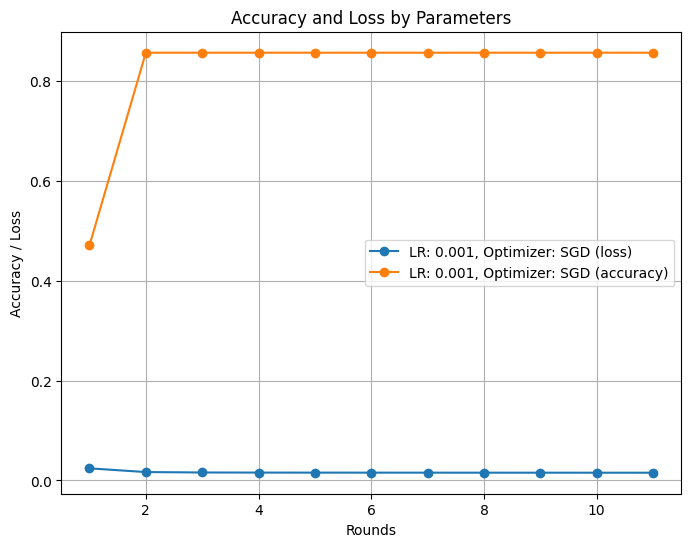

In [83]:
# making some plots
from Medfl.LearningManager.plot import AccuracyLossPlotter

global_accuracy,global_loss = ppl_1.server.accuracies,ppl_1.server.losses
results_dict = {
    ('LR: 0.001, Optimizer: SGD', 'accuracy'): global_accuracy,
    ('LR: 0.001, Optimizer: SGD', 'loss'): global_loss
}
plotter = AccuracyLossPlotter(results_dict)

plotter.plot_accuracy_loss()

In [84]:
ppl_1.auto_test()


[{'node_name': 'Midwest',
  'classification_report': "{'confusion matrix': {'TP': 0, 'FP': 3, 'FN': 157, 'TN': 883}, 'Accuracy': 0.847, 'Sensitivity/Recall': 0.0, 'Specificity': 0.997, 'PPV/Precision': 0.0, 'NPV': 0.849, 'F1-score': 0.0, 'False positive rate': 0.003, 'True positive rate': 0.0}"},
 {'node_name': 'South',
  'classification_report': "{'confusion matrix': {'TP': 2, 'FP': 5, 'FN': 141, 'TN': 560}, 'Accuracy': 0.794, 'Sensitivity/Recall': 0.014, 'Specificity': 0.991, 'PPV/Precision': 0.286, 'NPV': 0.799, 'F1-score': 0.027, 'False positive rate': 0.009, 'True positive rate': 0.014}"},
 {'node_name': 'West',
  'classification_report': "{'confusion matrix': {'TP': 0, 'FP': 1, 'FN': 548, 'TN': 2352}, 'Accuracy': 0.811, 'Sensitivity/Recall': 0.0, 'Specificity': 1.0, 'PPV/Precision': 0.0, 'NPV': 0.811, 'F1-score': 0.0, 'False positive rate': 0.0, 'True positive rate': 0.0}"},
 {'node_name': 'Northeast',
  'classification_report': "{'confusion matrix': {'TP': 10, 'FP': 25, 'FN': 24

In [85]:
import json 

result = [{'node_name': 'Midwest',
  'classification_report': "{'confusion matrix': {'TP': 0, 'FP': 1, 'FN': 164, 'TN': 878}, 'Accuracy': 0.842, 'Sensitivity/Recall': 0.0, 'Specificity': 0.999, 'PPV/Precision': 0.0, 'NPV': 0.843, 'F1-score': 0.01, 'False positive rate': 0.001, 'True positive rate': 0.0}"},
 {'node_name': 'South',
  'classification_report': "{'confusion matrix': {'TP': 1, 'FP': 3, 'FN': 161, 'TN': 543}, 'Accuracy': 0.768, 'Sensitivity/Recall': 0.006, 'Specificity': 0.995, 'PPV/Precision': 0.25, 'NPV': 0.771, 'F1-score': 0.012, 'False positive rate': 0.005, 'True positive rate': 0.006}"},
 {'node_name': 'West',
  'classification_report': "{'confusion matrix': {'TP': 5, 'FP': 17, 'FN': 543, 'TN': 2336}, 'Accuracy': 0.807, 'Sensitivity/Recall': 0.009, 'Specificity': 0.993, 'PPV/Precision': 0.227, 'NPV': 0.811, 'F1-score': 0.018, 'False positive rate': 0.007, 'True positive rate': 0.009}"},
 {'node_name': 'Northeast',
  'classification_report': "{'confusion matrix': {'TP': 13, 'FP': 25, 'FN': 246, 'TN': 960}, 'Accuracy': 0.782, 'Sensitivity/Recall': 0.05, 'Specificity': 0.975, 'PPV/Precision': 0.342, 'NPV': 0.796, 'F1-score': 0.088, 'False positive rate': 0.025, 'True positive rate': 0.05}"}]

for entry in result:
           node_name = entry['node_name']
           classification_report_str = entry['classification_report']

           # Convert the 'classification_report' string to a dictionary
           classification_report_dict = json.loads(classification_report_str.replace("'", "\""))

           # Extract specific values
           accuracy = classification_report_dict['Accuracy']
           sensitivity = classification_report_dict['Sensitivity/Recall']
           precision = classification_report_dict['PPV/Precision']
           # ... and so on

           # Insert record into the 'testResults' table
           print (json.dumps(classification_report_dict['confusion matrix']))

{"TP": 0, "FP": 1, "FN": 164, "TN": 878}
{"TP": 1, "FP": 3, "FN": 161, "TN": 543}
{"TP": 5, "FP": 17, "FN": 543, "TN": 2336}
{"TP": 13, "FP": 25, "FN": 246, "TN": 960}
